# Explatory Data Analysis of Celeb-DF dataset




In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. EDA of hand-crafted data
In this section hand-crafted data is explored and visualized to have an idea how the data is shaped.

Each video processed with Openface has a csv file with their corresponding features. The first 5 columns are deleted since they are not informative. Each video has multiple frames, depending on how long the video is. In the preprocessing functions below, the hand-crafted features are processed into a vector of the first x frames, containing the 709 hand-crafted features.
The movementens of facial musclees can be encoded using facial action units (AU) (Ekman and Wallace, 1976). The OpenFace2.0 toolkit of Baltrusaitis et al. (2018) extracts the occurence and intensity of 17 action units in a video. 

In [ ]:
df = pd.read_csv('/path/data_sampled/real_hand/id2_0000.csv')
df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_29,p_30,p_31,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.067607,0.246884,-0.966684,0.001882,0.233208,-0.972425,0.036,0.243,259.6,261.0,265.4,270.2,272.6,271.6,266.8,262.0,254.8,257.6,261.6,266.7,271.9,276.0,279.0,276.1,271.7,266.7,262.1,257.9,264.5,266.5,268.4,269.0,268.0,265.9,264.1,...,0.081,0.185,-0.088,0.034,0.149,0.0,0.0,0.0,0.0,0.45,0.61,0.26,0.84,0.06,0.00,0.0,2.27,0.12,1.10,0.00,0.42,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.033,0.98,1,0.060461,0.278495,-0.958533,0.011661,0.269350,-0.962972,0.038,0.278,259.6,260.8,265.1,269.8,272.2,271.3,266.7,262.0,254.6,257.6,261.8,266.9,271.8,275.5,278.0,275.5,271.7,267.1,262.4,258.0,264.2,266.2,268.0,268.5,267.5,265.5,263.7,...,0.208,0.097,-0.142,0.062,0.202,0.0,0.0,0.0,0.0,0.48,0.60,0.09,0.92,0.03,0.00,0.0,2.09,0.21,1.16,0.05,0.45,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.067,0.98,1,0.053184,0.277567,-0.959233,0.003650,0.267872,-0.963448,0.030,0.276,259.4,260.7,265.0,269.7,272.1,271.2,266.6,261.8,254.6,257.5,261.7,266.8,271.8,275.6,278.4,275.7,271.6,266.9,262.2,258.0,264.2,266.1,267.9,268.5,267.5,265.5,263.7,...,0.177,0.131,-0.154,0.049,0.213,0.0,0.0,0.0,0.0,0.48,0.59,0.00,0.90,0.01,0.00,0.0,1.89,0.22,1.12,0.05,0.73,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,4,0,0.100,0.98,1,0.069347,0.256656,-0.964012,-0.005829,0.251622,-0.967808,0.033,0.257,259.4,260.7,265.0,269.8,272.2,271.3,266.6,261.9,254.4,257.3,261.5,266.6,271.6,275.4,278.0,275.5,271.5,266.8,262.2,257.8,264.1,266.2,268.0,268.6,267.5,265.5,263.6,...,0.079,0.336,-0.183,0.003,0.186,0.0,0.0,0.0,0.0,0.42,0.61,0.04,0.81,0.00,0.00,0.0,1.93,0.31,0.95,0.02,0.83,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0.133,0.98,1,0.087020,0.223989,-0.970699,0.002719,0.245277,-0.969449,0.046,0.237,259.0,260.2,264.5,269.5,272.1,271.3,266.6,261.6,253.3,256.5,260.8,266.1,271.2,275.2,278.0,275.5,271.3,266.5,261.6,257.0,263.9,266.0,267.8,268.3,267.2,265.1,263.3,...,-0.090,0.371,-0.062,-0.036,0.191,0.0,0.0,0.0,0.0,0.34,0.62,0.06,0.71,0.00,0.00,0.0,1.94,0.26,0.91,0.00,0.80,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,441,0,14.667,0.98,1,0.180109,0.202709,-0.962533,0.124358,0.258085,-0.958085,0.157,0.235,283.9,284.7,289.0,294.2,297.3,296.8,292.2,287.0,277.0,280.2,284.8,290.4,295.7,299.7,302.5,300.4,296.4,291.6,286.4,281.4,288.9,291.1,292.9,293.2,292.0,289.8,288.0,...,-0.442,0.349,0.233,-0.145,0.028,0.0,0.0,0.0,0.0,0.19,0.00,0.00,0.20,0.00,0.78,0.0,0.62,0.00,0.13,0.00,0.26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
441,442,0,14.700,0.98,1,0.187324,0.204802,-0.960711,0.126355,0.262870,-0.956522,0.162,0.239,284.0,284.8,289.1,294.3,297.3,296.9,292.2,287.1,277.1,280.2,284.8,290.4,295.7,299.7,302.5,300.4,296.4,291.5,286.4,281.4,289.0,291.2,292.9,293.3,292.0,289.8,288.1,...,-0.436,0.348,0.229,-0.146,0.020,0.0,0.0,0.0,0.0,0.24,0.0

In [ ]:
# Explore all columns
for i, coln in enumerate(df):
  print(i, coln)

0 frame
1  face_id
2  timestamp
3  confidence
4  success
5  gaze_0_x
6  gaze_0_y
7  gaze_0_z
8  gaze_1_x
9  gaze_1_y
10  gaze_1_z
11  gaze_angle_x
12  gaze_angle_y
13  eye_lmk_x_0
14  eye_lmk_x_1
15  eye_lmk_x_2
16  eye_lmk_x_3
17  eye_lmk_x_4
18  eye_lmk_x_5
19  eye_lmk_x_6
20  eye_lmk_x_7
21  eye_lmk_x_8
22  eye_lmk_x_9
23  eye_lmk_x_10
24  eye_lmk_x_11
25  eye_lmk_x_12
26  eye_lmk_x_13
27  eye_lmk_x_14
28  eye_lmk_x_15
29  eye_lmk_x_16
30  eye_lmk_x_17
31  eye_lmk_x_18
32  eye_lmk_x_19
33  eye_lmk_x_20
34  eye_lmk_x_21
35  eye_lmk_x_22
36  eye_lmk_x_23
37  eye_lmk_x_24
38  eye_lmk_x_25
39  eye_lmk_x_26
40  eye_lmk_x_27
41  eye_lmk_x_28
42  eye_lmk_x_29
43  eye_lmk_x_30
44  eye_lmk_x_31
45  eye_lmk_x_32
46  eye_lmk_x_33
47  eye_lmk_x_34
48  eye_lmk_x_35
49  eye_lmk_x_36
50  eye_lmk_x_37
51  eye_lmk_x_38
52  eye_lmk_x_39
53  eye_lmk_x_40
54  eye_lmk_x_41
55  eye_lmk_x_42
56  eye_lmk_x_43
57  eye_lmk_x_44
58  eye_lmk_x_45
59  eye_lmk_x_46
60  eye_lmk_x_47
61  eye_lmk_x_48
62  eye_lmk_x

In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Columns: 714 entries, frame to  AU45_c
dtypes: float64(711), int64(3)
memory usage: 2.4 MB


In [ ]:
feature_colnames = ['gaze_angle_x', 'gaze_angle_y', 'pose_Rx', 'pose_Ry', 'pose_Rz', 'AU01_r',
                  'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 
                  'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 
                  'mouth_openness', 'mouth_stretch'
                  ]
# Column indexes of hand-crafted features from openface (mouth openness and mouth stretch are added later)
feature_colindex = [11,12,296,297,298,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695]

In [ ]:
df.shape
df.index
#print(df.columns)

new_data = df[[' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r', 
      ' AU14_r', ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r']]

eye_gaze = df[[' gaze_angle_x', ' gaze_angle_y']]
head_poze = df[[' pose_Rx', ' pose_Ry', ' pose_Rz']]

n_max = np.array(new_data).max()
n_min = np.array(new_data).min()
nd = (new_data - n_min) / (n_max - n_min)


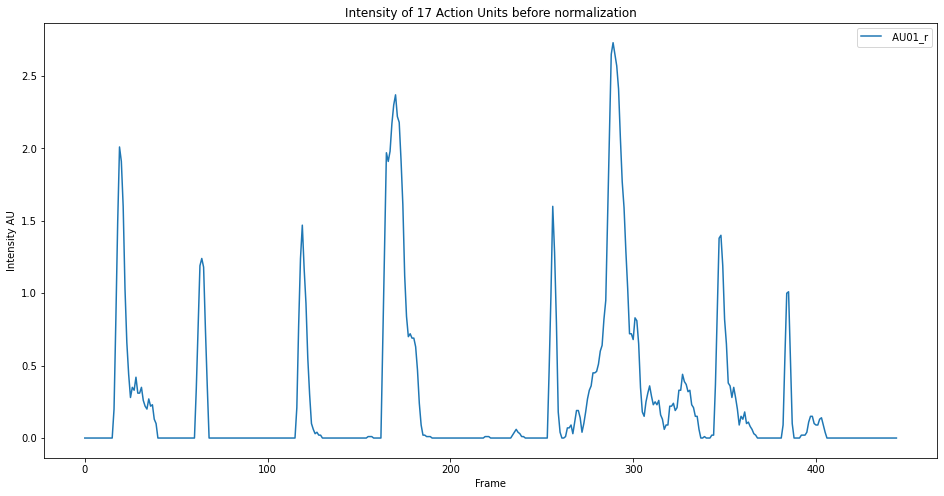

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Intensity of 17 Action Units before normalization')
plt.plot(new_data[' AU45_r'])
plt.ylabel('Intensity AU')
plt.xlabel('Frame')
plt.legend(new_data.columns)
plt.show()

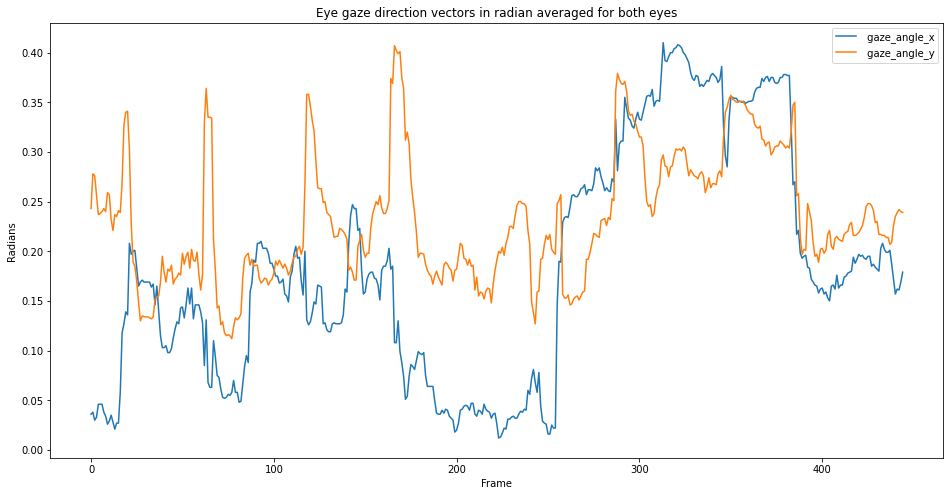

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Eye gaze direction vectors in radian averaged for both eyes')
plt.plot(eye_gaze)
plt.ylabel('Radians')
plt.xlabel('Frame')
plt.legend(eye_gaze.columns)
plt.show()

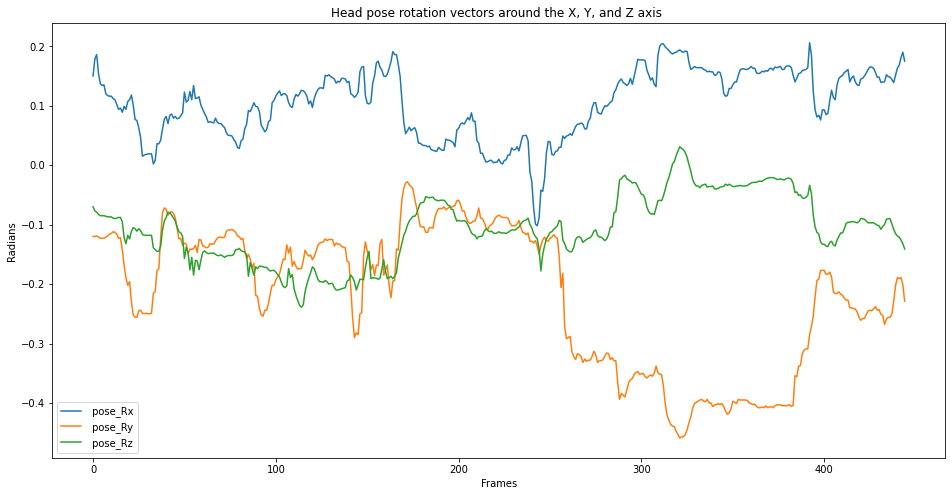

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Head pose rotation vectors around the X, Y, and Z axis ')
plt.plot(head_poze)
plt.ylabel('Radians')
plt.xlabel('Frames')
plt.legend(head_poze.columns)
plt.show()

## Compute additional hand-crafted features

In [ ]:
# Visualize the mouth stretch vector
# Visualize the mouth stretch vecotor in amplitude, velocity and accelaration after normalization
data = np.array(df)
print(data.shape)

# For all frames, make a 3-dimensional array for each point
uppermouth = data[:, [486, 554, 622]]
lowermouth = data[:, [492, 560, 628]]
leftmouthcorner = data[:, [483, 551, 619]]
rightmouthcorner = data[:, [489, 557, 625]]
tip_nose = data[:, [465, 533, 601]]

def euclidean_distance(point1, point2):
  '''Function that computes the euclidean distance between two 3d points.'''
  return np.sqrt(np.sum((point1-point2)**2, axis=1))

# Calculate amplitude signals through euclidean distance
lipsuck = euclidean_distance(uppermouth, lowermouth)
mouthstretch = euclidean_distance(leftmouthcorner, rightmouthcorner)
nose_leftmouth = euclidean_distance(tip_nose, leftmouthcorner)
nose_rightmouth = euclidean_distance(tip_nose, rightmouthcorner)
nose_uppermouth = euclidean_distance(tip_nose, uppermouth)
nose_lowermouth = euclidean_distance(tip_nose, lowermouth)

# Calculate velocity signals by subtracting amplitude from its shifted version
mouthstretch_shifted = np.roll(mouthstretch, 1, axis=0)
#mouthstretch[:1] = 0
mouthstretch_velocity = mouthstretch_shifted - mouthstretch

mouthstretch_velocity_shifted = np.roll(mouthstretch_velocity, 1, axis=0)
#mouthstretch_velocity_shifted[:1] = 0
mouthstretch_acceleration = mouthstretch_velocity_shifted - mouthstretch_velocity

data_plot = np.array([mouthstretch, mouthstretch_velocity, mouthstretch_acceleration]).reshape(445, 3)
d_max = np.array(data_plot).max()
d_min = np.array(data_plot).min()
data_plot_normalized = (data_plot - d_min) / (d_max - d_min)
d = data_plot_normalized.reshape(len(data),3)

# For simplicity, the first frame is not set to zero in this example.

(445, 714)


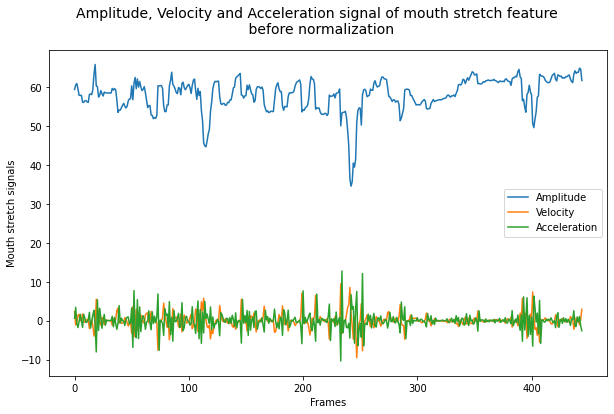

In [ ]:
plt.figure(figsize=(10,6))
plt.suptitle('Amplitude, Velocity and Acceleration signal of mouth stretch feature \n before normalization', fontsize=14)
plt.plot(mouthstretch)
plt.plot(mouthstretch_velocity)
plt.plot(mouthstretch_acceleration)
plt.ylabel('Mouth stretch signals')
plt.xlabel('Frames')
plt.legend(['Amplitude', 'Velocity', 'Acceleration'])
plt.savefig('/path/plots/plot_mouthstretch.png')
plt.show()

(445, 3)
(10,)


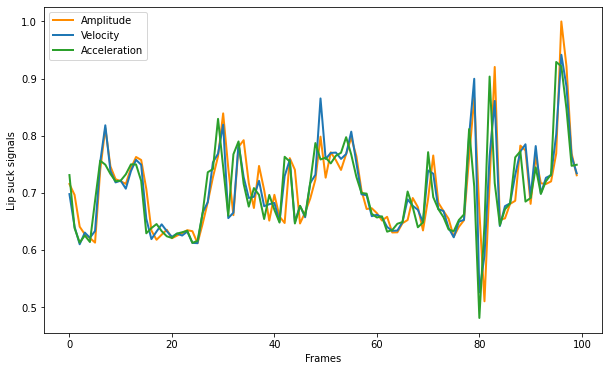

In [ ]:
lipsuck_shifted = np.roll(lipsuck, 1, axis=0)
#lipsuck[:1] = 0
lipsuck_velocity = lipsuck_shifted - lipsuck
lipsuck_velocity_shifted = np.roll(lipsuck_velocity, 1, axis=0)
#lipsuck_velocity_shifted[:1] = 0
lipsuck_acceleration = lipsuck_velocity_shifted - lipsuck_velocity

data_plot = np.array([lipsuck, lipsuck_velocity, lipsuck_acceleration]).reshape(445, 3)
d_max = np.array(data_plot).max()
d_min = np.array(data_plot).min()
data_plot_normalized = (data_plot - d_min) / (d_max - d_min)
d = data_plot_normalized.reshape(len(data),3)
print(d.shape)
print(d[:,0][:10].shape)

plt.figure(figsize=(10,6))
#plt.suptitle('Amplitude, Velocity and Acceleration signal of mouth vertical feature \n after normalization', fontsize=14)
plt.plot(d[:,0][:100], linewidth=2, color='darkorange')
plt.plot(d[:,1][:100], linewidth=2, color='tab:blue')
plt.plot(d[:,2][:100], linewidth=2, color='tab:green')
plt.ylabel('Lip suck signals')
plt.xlabel('Frames')
plt.legend(['Amplitude', 'Velocity', 'Acceleration'])
plt.savefig('/path/plots/plot_lipsuck.png')
plt.show()